## **📊 Telecom X - Análisis de Evasión de Clientes**


---



⭐**Detalles del Desafío**

Has sido contratado como asistente de análisis de datos en Telecom X y formarás
parte del proyecto **"Churn de Clientes"**. La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.


---




## **1️⃣📌 Extracción**

En esta etapa se importan los datos desde la API en formato JSON y se convierten en un DataFrame para su análisis.

In [5]:
import requests
import pandas as pd

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

response = requests.get(url)
data = response.json()
df = pd.json_normalize(data)

df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


## **2️⃣🔧 Transformación**
Se verifican inconsistencias, valores nulos, duplicados y se realizan las correcciones necesarias.

### **2.1 Verificaciones**

In [7]:
# Valores únicos
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

# Duplicados
print("Duplicados:", df.duplicated().sum())

# Nulos
print("Nulos:\n", df.isnull().sum())

# Espacios en blanco
df.apply(lambda x: x.astype(str).str.strip() == '').sum()


customerID: 7267
Churn: 3
customer.gender: 2
customer.SeniorCitizen: 2
customer.Partner: 2
customer.Dependents: 2
customer.tenure: 73
phone.PhoneService: 2
phone.MultipleLines: 3
internet.InternetService: 3
internet.OnlineSecurity: 3
internet.OnlineBackup: 3
internet.DeviceProtection: 3
internet.TechSupport: 3
internet.StreamingTV: 3
internet.StreamingMovies: 3
account.Contract: 3
account.PaperlessBilling: 2
account.PaymentMethod: 4
account.Charges.Monthly: 1585
account.Charges.Total: 6531
Duplicados: 0
Nulos:
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.Streaming

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


### **2.2 Correcciones**

In [8]:
# Convertir Total a numérico
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Eliminar registros con Churn vacío
df = df[df['Churn'].str.strip() != '']

# Eliminar nulos en total
df = df.dropna(subset=['account.Charges.Total'])


### **2.3 Creación de una variable nueva**

In [9]:
# Crear columna cuentas diarias
df['cuentas_diarias'] = df['account.Charges.Monthly'] / 30

### **2.4 Renombrar y Traducir celdas**

In [10]:
df = df.rename(columns={
    'customerID': 'id',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': ' mayor_60',
    'customer.Partner': 'posee_pareja',
    'customer.Dependents': 'posee_dependientes',
    'customer.tenure': 'tiempo_contrato',
    'phone.PhoneService': 'servicio_telefono',
    'phone.MultipleLines': 'multiples_lineas',
    'internet.InternetService': 'tipo_internet',
    'internet.OnlineSecurity': 'seguridad_online',
    'internet.OnlineBackup': 'backup_online',
    'internet.DeviceProtection': 'proteccion_dispositivo',
    'internet.TechSupport': 'soporte_tecnico',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_peliculas',
    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'factura_digital',
    'account.PaymentMethod': 'metodo_pago',
    'account.Charges.Monthly': 'valor_mensual',
    'account.Charges.Total': 'total_cobrado'
})


df['Churn'] = df['Churn'].replace({'No': 'No', 'Yes': 'Sí'})
df['genero'] = df['genero'].replace({'Female': 'Femenino', 'Male': 'Masculino'})
df['posee_pareja'] = df['posee_pareja'].replace({'Yes': 'Sí', 'No': 'No'})
df['posee_dependientes'] = df['posee_dependientes'].replace({'Yes': 'Sí', 'No': 'No'})
df['servicio_telefono'] = df['servicio_telefono'].replace({'Yes': 'Sí', 'No': 'No'})
df['multiples_lineas'] = df['multiples_lineas'].replace({'No': 'No', 'Yes': 'Sí', 'No phone service': 'Sin servicio de teléfono'})
df['tipo_internet'] = df['tipo_internet'].replace({'No': 'No'})
df['tipo_contrato'] = df['tipo_contrato'].replace({'One year': 'Anual', 'Month-to-month': 'Mensual', 'Two year': 'Bianual'})



df.head()


,id,Churn,genero,mayor_60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensual,total_cobrado,cuentas_diarias
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,...,No,Yes,Yes,No,Anual,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,...,No,No,No,Yes,Mensual,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Sí,Masculino,0,No,No,4,Sí,No,Fiber optic,...,Yes,No,No,No,Mensual,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Sí,Masculino,1,Sí,No,13,Sí,No,Fiber optic,...,Yes,No,Yes,Yes,Mensual,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Sí,Femenino,1,Sí,No,3,Sí,No,Fiber optic,...,No,Yes,Yes,No,Mensual,Yes,Mailed check,83.9,267.40,2.796667


In [11]:
columnas_a_traducir = ['seguridad_online', 'backup_online', 'proteccion_dispositivo', 'soporte_tecnico', 'streaming_tv', 'streaming_peliculas']
mapeo = {'No': 'No', 'Yes': 'Sí', 'No internet service': 'Sin servicio de internet'}

for col in columnas_a_traducir:
    df[col] = df[col].replace(mapeo)

df['metodo_pago'] = df['metodo_pago'].replace({
    'Mailed check': 'Cheque enviado por correo',
    'Electronic check': 'Cheque electrónico',
    'Credit card (automatic)': 'Tarjeta de crédito (automático)',
    'Bank transfer (automatic)': 'Transferencia bancaria (automática)'
})
df.head()

,id,Churn,genero,mayor_60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensual,total_cobrado,cuentas_diarias
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,...,No,Sí,Sí,No,Anual,Yes,Cheque enviado por correo,65.6,593.30,2.186667
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,...,No,No,No,Sí,Mensual,No,Cheque enviado por correo,59.9,542.40,1.996667
2,0004-TLHLJ,Sí,Masculino,0,No,No,4,Sí,No,Fiber optic,...,Sí,No,No,No,Mensual,Yes,Cheque electrónico,73.9,280.85,2.463333
3,0011-IGKFF,Sí,Masculino,1,Sí,No,13,Sí,No,Fiber optic,...,Sí,No,Sí,Sí,Mensual,Yes,Cheque electrónico,98.0,1237.85,3.266667
4,0013-EXCHZ,Sí,Femenino,1,Sí,No,3,Sí,No,Fiber optic,...,No,Sí,Sí,No,Mensual,Yes,Cheque enviado por correo,83.9,267.40,2.796667


In [12]:
df

,id,Churn,genero,mayor_60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensual,total_cobrado,cuentas_diarias
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,...,No,Sí,Sí,No,Anual,Yes,Cheque enviado por correo,65.60,593.30,2.186667
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,...,No,No,No,Sí,Mensual,No,Cheque enviado por correo,59.90,542.40,1.996667
2,0004-TLHLJ,Sí,Masculino,0,No,No,4,Sí,No,Fiber optic,...,Sí,No,No,No,Mensual,Yes,Cheque electrónico,73.90,280.85,2.463333
3,0011-IGKFF,Sí,Masculino,1,Sí,No,13,Sí,No,Fiber optic,...,Sí,No,Sí,Sí,Mensual,Yes,Cheque electrónico,98.00,1237.85,3.266667
4,0013-EXCHZ,Sí,Femenino,1,Sí,No,3,Sí,No,Fiber optic,...,No,Sí,Sí,No,Mensual,Yes,Cheque enviado por correo,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Femenino,0,No,No,13,Sí,No,DSL,...,No,Sí,No,No,Anual,No,Cheque enviado por correo,55.15,742.90,1.838333
7263,9992-RRAMN,Sí,Masculino,0,Sí,No,22,Sí,Sí,Fiber optic,...,No,No,No,Sí,Mensual,Yes,Cheque electrónico,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Masculino,0,No,No,2,Sí,No,DSL,...,No,No,No,No,Mensual,Yes,Cheque enviado por correo,50.30,92.75,1.676667
7265,9993-LHIEB,No,Masculino,0,Sí,Sí,67,Sí,No,DSL,...,Sí,Sí,No,Sí,Bianual,No,Cheque enviado por correo,67.85,4627.65,2.261667


## **3️⃣📊 Carga y Análisis**
Se realiza análisis descriptivo, visualizaciones y estudio de correlaciones.

### **3.1 Análisis descriptivo**

In [13]:
df.describe()

,mayor_60,tiempo_contrato,valor_mensual,total_cobrado,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159940
std,0.368844,24.545260,30.085974,2266.771362,1.002866
min,0.000000,1.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.587500,401.450000,1.186250
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.862500,3794.737500,2.995417
max,1.000000,72.000000,118.750000,8684.800000,3.958333


### **3.2 Distribución de Churn**

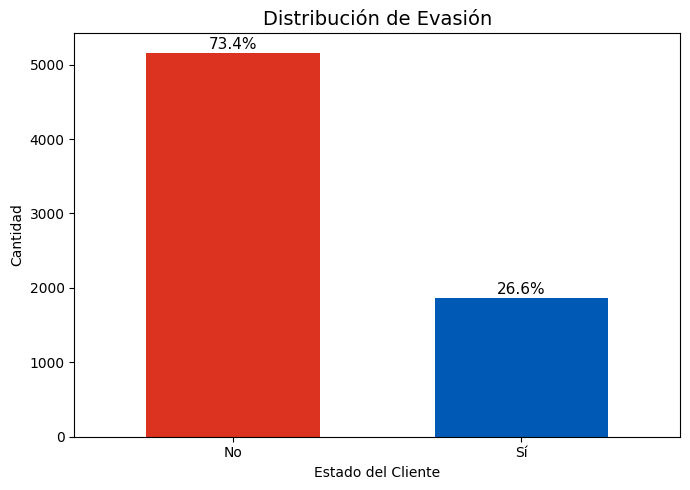

In [14]:
import matplotlib.pyplot as plt

churn_counts = df['Churn'].value_counts()
churn_percent = churn_counts / len(df) * 100

colores_barra = ['#DC3220', '#005AB5']  # Naranja y Azul

plt.figure(figsize=(7,5))

ax = churn_counts.plot(
    kind='bar',
    color=colores_barra,
    width=0.6
)

plt.title("Distribución de Evasión", fontsize=14)
plt.xlabel("Estado del Cliente")
plt.ylabel("Cantidad")
plt.xticks(rotation=0)

for i, p in enumerate(churn_percent):
    ax.text(
        i,
        churn_counts.iloc[i] + 50,
        f"{p:.1f}%",
        ha='center',
        fontsize=11
    )

plt.tight_layout()
plt.show()


### **3.3 Churn por genero**

In [15]:
import plotly.express as px

colores = {'No': '#DC3220', 'Sí': '#005AB5'}

color_discrete_map=colores


In [25]:
tabla_genero = pd.crosstab(df['genero'], df['Churn'], normalize='index') * 100
tabla_genero = tabla_genero.reset_index()

fig = px.bar(
    tabla_genero,
    x='genero',
    y=['No','Sí'],
    barmode='group',
    text_auto='.1f',
    color_discrete_map={'No': '#DC3220', 'Sí': '#005AB5'},
    title='Porcentaje de Churn por Género'
)

fig.update_layout(
    yaxis_title='Porcentaje (%)',
    xaxis_title='Género',
    width=900,
    height=500
)

fig.show()



### **3.4 Churn por Antiguedad**

In [54]:
fig = px.histogram(
    df,
    x='tiempo_contrato',
    color='Churn',
    barmode='group',
    text_auto = True,
    color_discrete_map=colores,
    title='Distribución de Churn por Antigüedad'
)

fig.update_layout(width=1200, height=500)
fig.show()


In [55]:
tabla_lineas = df.groupby(['tiempo_contrato','Churn']).size().reset_index(name='cantidad')

fig = px.line(
    tabla_lineas,
    x='tiempo_contrato',
    y='cantidad',
    color='Churn',
    markers=True,
    text='cantidad',
    color_discrete_map=colores,
    title='Tendencia de Churn según Antigüedad'
)

fig.update_traces(textposition='top center')
fig.update_layout(width=1200, height=500)

fig.show()


In [60]:
fig = px.bar(
    tabla_antiguedad,
    y='rango_antiguedad',
    x='Churn_bin',
    text_auto='.1f',
    color='Churn_bin',
    color_continuous_scale=['#005AB5', '#DC3220'],
    orientation='h',
    title='Tasa de Churn por Rango de Antigüedad (%)'
)

fig.update_layout(
    xaxis_title='Porcentaje de Churn',
    yaxis_title='Antigüedad',
    width=900,
    height=500
)

fig.show()


### **3.5 Churn por Tipo de Contrato**

In [40]:
fig = px.histogram(
    df,
    x='tipo_contrato',
    color='Churn',
    barmode='group',
    text_auto=True,
    color_discrete_map=colores,
    title='Churn por Tipo de Contrato'
)

fig.update_layout(width=900, height=500)
fig.show()



In [61]:
fig = px.bar(
    tabla_contrato,
    y='tipo_contrato',
    x='Sí',
    text_auto='.1f',
    color='Sí',
    color_continuous_scale=['#005AB5', '#DC3220'],
    orientation='h',
    title='Tasa de Churn por Tipo de Contrato (%)'
)

fig.update_layout(
    xaxis_title='Porcentaje de Churn',
    yaxis_title='Tipo de Contrato',
    width=900,
    height=500
)

fig.show()


### **3.6 Churn por Tipo de Servicio de Internet**

In [29]:
tabla_internet = pd.crosstab(df['tipo_internet'], df['Churn'], normalize='index') * 100
tabla_internet = tabla_internet.reset_index()

fig = px.bar(
    tabla_internet,
    x='tipo_internet',
    y=['No','Sí'],
    barmode='group',
    text_auto='.1f',
    color_discrete_map={'No': '#DC3220', 'Sí': '#005AB5'},
    title='Porcentaje de Churn por Tipo de Internet'
)

fig.update_layout(
    yaxis_title='Porcentaje (%)',
    width=900,
    height=500
)

fig.show()


### **3.7 Churn por Metodo de Pago**

In [36]:
fig = px.histogram(
    df,
    x='metodo_pago',
    color='Churn',
    barmode='group',
    text_auto=True,
    color_discrete_map=colores,
    title='Churn por Método de Pago'
)

fig.update_layout(width=1000, height=500)
fig.show()




### **3.4 Variables numéricas**

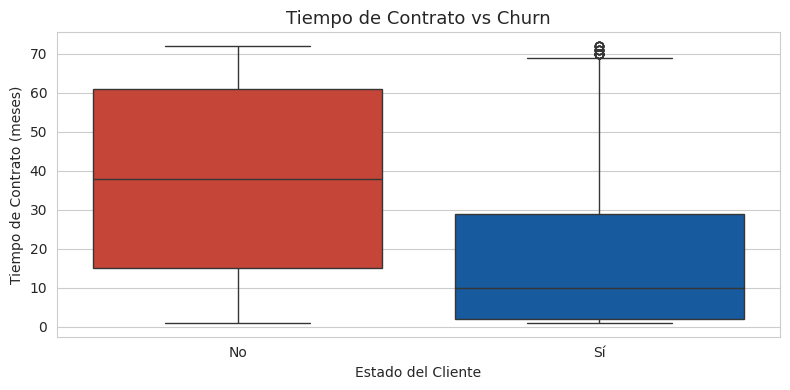

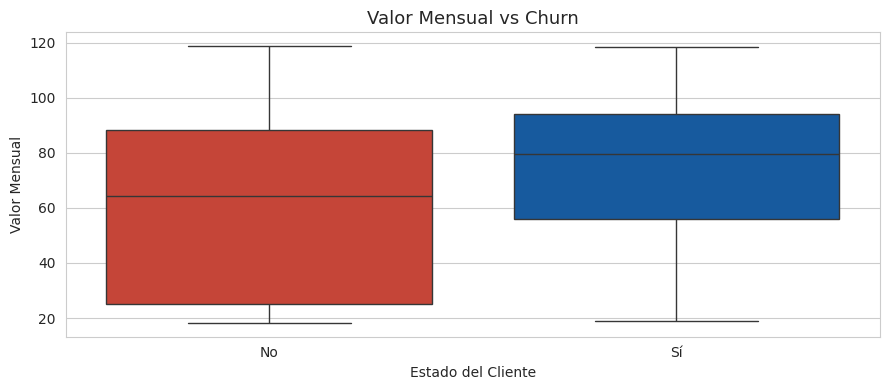

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo más limpio
sns.set_style("whitegrid")

# Paleta personalizada
colores = {'No': '#DC3220', 'Sí': '#005AB5'}

# Boxplot 1: Tiempo de Contrato vs Churn
plt.figure(figsize=(8,4))

sns.boxplot(
    data=df,
    x='Churn',
    y='tiempo_contrato',
    hue='Churn',
    palette=colores,
    legend=False
)

plt.title("Tiempo de Contrato vs Churn", fontsize=13)
plt.xlabel("Estado del Cliente")
plt.ylabel("Tiempo de Contrato (meses)")

plt.tight_layout()
plt.show()


# Boxplot 2: Valor Mensual vs Churn
plt.figure(figsize=(9,4))

sns.boxplot(
    data=df,
    x='Churn',
    y='valor_mensual',
    hue='Churn',
    palette=colores,
    legend=False
)

plt.title("Valor Mensual vs Churn", fontsize=13)
plt.xlabel("Estado del Cliente")
plt.ylabel("Valor Mensual")

plt.tight_layout()
plt.show()

### **3.5 Correlación**

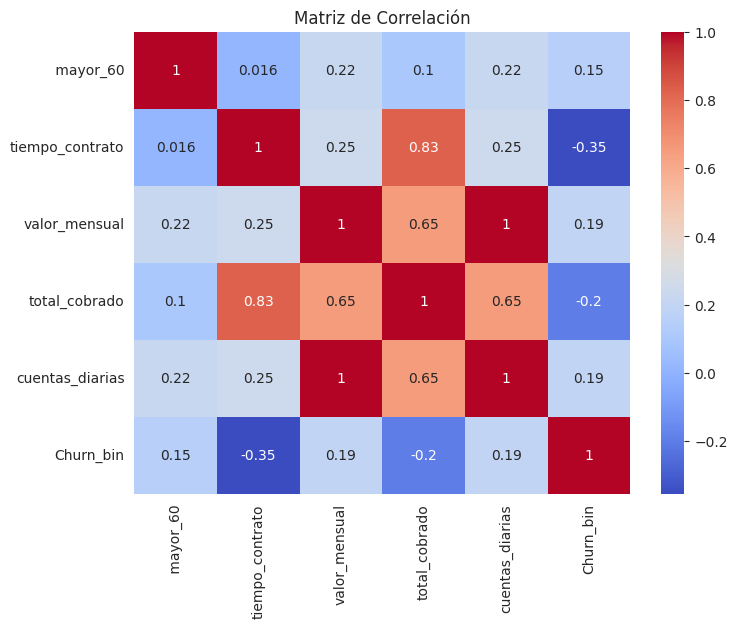

In [23]:
# Variable binaria para correlación
df['Churn_bin'] = df['Churn'].map({'No':0,'Sí':1})

correlacion = df[[' mayor_60','tiempo_contrato','valor_mensual','total_cobrado','cuentas_diarias','Churn_bin']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlacion, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()


## **4️⃣Informe final**

### **🔹 Introducción**

El objetivo de este análisis fue identificar los factores asociados a la evasión de clientes (Churn) en Telecom X, utilizando técnicas de extracción, transformación y análisis exploratorio de datos.

---

### **🔹 Proceso Realizado**

Durante el proyecto se llevaron a cabo las siguientes etapas:

- Importación de datos desde una API en formato JSON.
- Normalización de la estructura jerárquica del dataset.
- Verificación de valores nulos, duplicados e inconsistencias.
- Conversión de variables numéricas y eliminación de registros incompletos.
- Creación de la variable `cuentas_diarias`.
- Traducción y estandarización de columnas para facilitar el análisis.
- Visualización de patrones mediante gráficos categóricos, boxplots y análisis de correlación.

---

### **🔹 Principales Hallazgos**

Del análisis realizado se identificaron los siguientes patrones relevantes:

- Los clientes con contrato **mensual** presentan mayor tasa de evasión en comparación con contratos anuales o bianuales.
- La evasión se concentra principalmente en clientes con **baja antigüedad**.
- Los clientes que cancelan tienden a tener **mayores valores mensuales**.
- La correlación muestra que el **tiempo de contrato tiene relación negativa con el churn**, es decir, cuanto mayor es la permanencia, menor es la probabilidad de cancelación.
- Determinados métodos de pago y tipos de servicio de internet presentan mayor concentración de evasión.

---

### **🔹 Conclusiones**

La evasión en Telecom X no ocurre de manera aleatoria. Está asociada principalmente a:

- Tipo de contrato.
- Antigüedad del cliente.
- Nivel de facturación mensual.

El período más crítico se encuentra en los primeros meses de servicio, donde el riesgo de cancelación es mayor.

---

### **🔹 Recomendaciones Estratégicas**

A partir de los resultados obtenidos, se proponen las siguientes acciones:

- Incentivar contratos anuales o bienales mediante beneficios o descuentos.
- Implementar estrategias de retención durante los primeros meses del cliente.
- Revisar planes con valores mensuales elevados.
- Utilizar las variables identificadas para desarrollar un modelo predictivo de churn.

---

### **🔹 Cierre**

El análisis exploratorio permitió comprender los principales factores que influyen en la evasión de clientes.
Estos resultados pueden servir como base para la construcción de modelos predictivos y el diseño de estrategias de retención más efectivas.
